# Parkinson Disease Prediction



*   Parkinson's is a neurodegenerative progressive disorder disease.
*   Neurodegenerative diseases are a group of disorders that affect the neurons (nerve cells) in the brain, causing them to deteriorate over time and ultimately leading to the loss of function in various parts of the body.

 It appears in the part of the brain called substantia nigra. Normally these brain cells produce dopamine and these dopamine operates in a delicate balance with other neurotransmitters to help cordinate the millions of nerve and muscle cell involved in the movement. When these nerve cells die or become impaired, they lose the ability to produce the dopamine. When 60-80% of these cells are lost then enough dopamine are not produced and Parkinson's motor symptoms appear. Without enough dopamine, this balance is disrupted resulting tremor, rigidity, slowness of movement and impaired balance. So Parkinson's disease is caused by the disruption of the brain cells that produce the dopamine which allows the brain to communicate each other and control the fluency of the movement. It is thought that the disease begins many years before the motor symptoms appears and therefore, researchers are looking for ways to recognize the non-motor symptoms that appear early in the disease as early as possible, thereby halting the progression of the disease. A person suffering from the Parkinson's can have following symptoms:


1.   Tremor
2.   Rigidity muscle
3.  Slow movement
4.  Impaired Posture
5. Loss of Automatic Movement



//Used in github
The dataset used in this project is from Kaggle data bank. The dataset has 24 columns, thus we need to reduce the dimension before we train the data. The target or independent variable is "status" with binary values of 0 and 1. Status values for healthy person and PD person are 0 and 1 respectively. This is a classification probelm. The goal of this project is to develope the best machine learning model to predict the Parkinson's disease so that we can treat the patient in the timely manner


This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column).



# Importing Dependencies

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns

# metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV


# Importing Dataset

In [186]:
df=pd.read_csv('parkinsons.data')
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [187]:
df.shape

(195, 24)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [189]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [190]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [191]:
df['status'].value_counts()
# 0 --> Healthy
# 1 --> Parkinson

1    147
0     48
Name: status, dtype: int64

In [192]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


<Axes: >

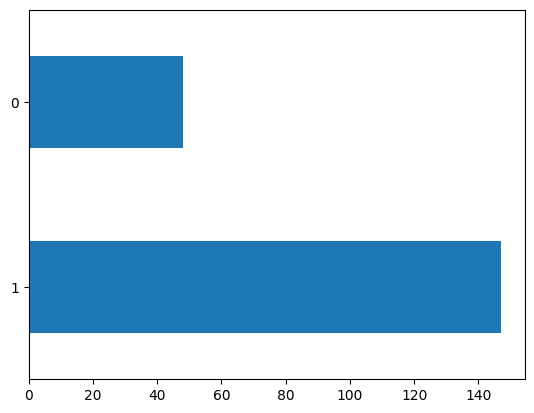

In [193]:
df['status'].value_counts().plot(kind='barh')

In [194]:
X=df.copy()
X=X.drop(['name','status'],axis=1)
Y=df[['status']]


<Axes: >

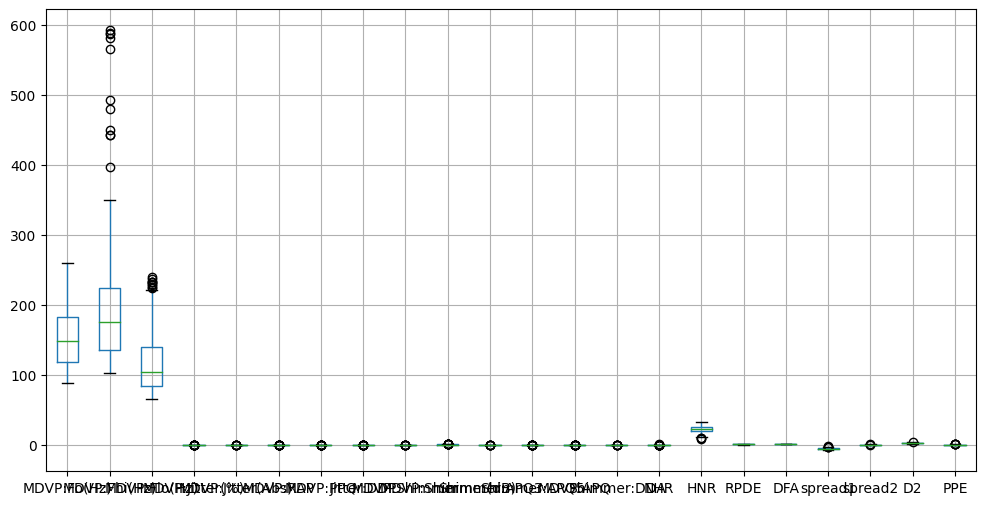

In [195]:
X.boxplot(figsize=(12,6))

In [196]:
Y.head()

,status
0,1
1,1
2,1
3,1
4,1


# Splitting the data into training and testing using StratifiedShuffleSplit
StratifiedShuffleSplit creates a stratified random sample of the data set, which means that the proportion of each target class is the same in both the training and test sets.


In [197]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=24)

for train_index,test_index in split.split(X,Y):
    X_train,Y_train=X.loc[train_index],Y.loc[train_index]
    X_test,Y_test=X.loc[test_index],Y.loc[test_index] 

In [198]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(156, 22) (156, 1)
(39, 22) (39, 1)


# Training the model using XGBClassifier

In [199]:
from xgboost import XGBClassifier 

In [200]:
# Training
xgb_regressor=XGBClassifier(eval_metric='rmse')
xgb_regressor.fit(X_train,Y_train)
xgb_pred=xgb_regressor.predict(X_test)


In [201]:

XGB_ACC=accuracy_score(xgb_pred,Y_test)
XGB_REC=recall_score(xgb_pred,Y_test)
XGB_MSE =mean_squared_error(xgb_pred,Y_test)
print('accuracy score %.2f'% XGB_ACC)
print('recall score %.2f'% XGB_REC)
print('root mean sqaured score %.2f'% XGB_MSE)

accuracy score 0.97
recall score 0.97
root mean sqaured score 0.03


In [202]:
print("Classification Report ",)
print(classification_report(xgb_pred,Y_test))

Classification Report 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.97      0.98        30

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



Confusion Matrix: 


<Axes: >

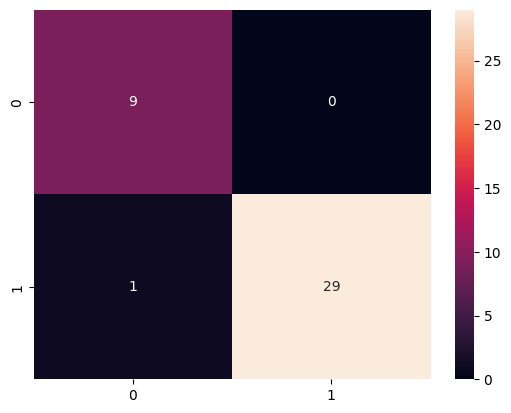

In [203]:
print("Confusion Matrix: ")
cf_matrix=confusion_matrix(xgb_pred,Y_test)
sns.heatmap(cf_matrix,annot=True)


# Training Model Using Logistic Regression

In [204]:
X=df.copy()
X=X.drop(['name','status'],axis=1)
Y=df[['status']]


In [205]:
# importing libraries for random forest
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [206]:
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(X)

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2,random_state=42) 

In [208]:
logistic_regressor=LogisticRegression()

In [209]:
param_grid=[
    {'penalty':['l1','l2','elasticnet','none'],
     'C' : np.logspace(-4, 4, 20),
     'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
     'max_iter':[100,1000,2500,5000]
    }
]

In [210]:
clf=GridSearchCV(logistic_regressor,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1)

In [211]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [212]:
best_clf.best_estimator_


LogisticRegression(C=29.763514416313132, max_iter=5000, penalty='l1',
                   solver='saga')

In [213]:
logistic_regressor= LogisticRegression()

-------------------------------------------------

In [214]:
logistic_regressor.fit(X_train,y_train)

LogisticRegression()

In [215]:
logistic_pred=best_clf.predict(X_test)

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39



<Axes: >

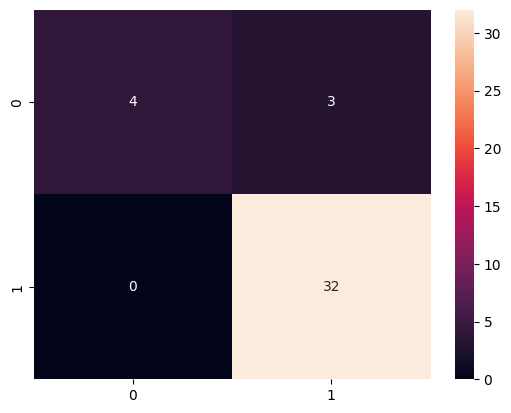

In [216]:
print("Confusion Matrix: ")
cf_matrix=confusion_matrix(y_test, logistic_pred)

print("\nClassification Report:")
print(classification_report(y_test, logistic_pred))
sns.heatmap(cf_matrix, annot=True)

### Summary

In [217]:
LOG_ACC=accuracy_score(y_test, logistic_pred)
LOG_REC=recall_score(y_test, logistic_pred)
LOG_MSE =mean_squared_error(y_test,logistic_pred)

print('accuracy score %.2f'% LOG_ACC)
print('recall score %.2f'% LOG_REC)
print('root mean sqaured score %.2f'% LOG_MSE)

accuracy score 0.92
recall score 1.00
root mean sqaured score 0.08


# Decision Tree

In [218]:
from sklearn.tree import DecisionTreeClassifier


In [219]:
for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
  print('')

The Training Accuracy for max_depth 1 is: 0.8525641025641025

The Training Accuracy for max_depth 2 is: 0.8717948717948718

The Training Accuracy for max_depth 3 is: 0.9743589743589743

The Training Accuracy for max_depth 4 is: 1.0

The Training Accuracy for max_depth 5 is: 1.0

The Training Accuracy for max_depth 6 is: 1.0

The Training Accuracy for max_depth 7 is: 1.0

The Training Accuracy for max_depth 8 is: 1.0

The Training Accuracy for max_depth 9 is: 1.0

The Training Accuracy for max_depth 10 is: 1.0

The Training Accuracy for max_depth 11 is: 1.0

The Training Accuracy for max_depth 12 is: 1.0

The Training Accuracy for max_depth 13 is: 1.0

The Training Accuracy for max_depth 14 is: 1.0

The Training Accuracy for max_depth 15 is: 1.0

The Training Accuracy for max_depth 16 is: 1.0

The Training Accuracy for max_depth 17 is: 1.0

The Training Accuracy for max_depth 18 is: 1.0

The Training Accuracy for max_depth 19 is: 1.0

The Training Accuracy for max_depth 20 is: 1.0



In [220]:
dt = DecisionTreeClassifier(random_state=42,max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [221]:
pred_dt_test = dt.predict(X_test)

Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



<Axes: >

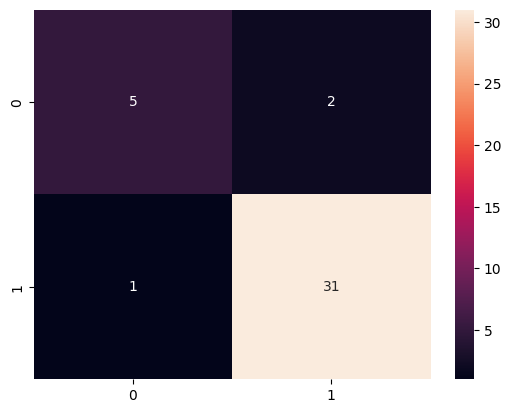

In [222]:
print("Confusion Matrix: ")
cf_matrix=confusion_matrix(y_test, pred_dt_test)

print("\nClassification Report:")
print(classification_report(y_test, pred_dt_test))


sns.heatmap(cf_matrix, annot=True)

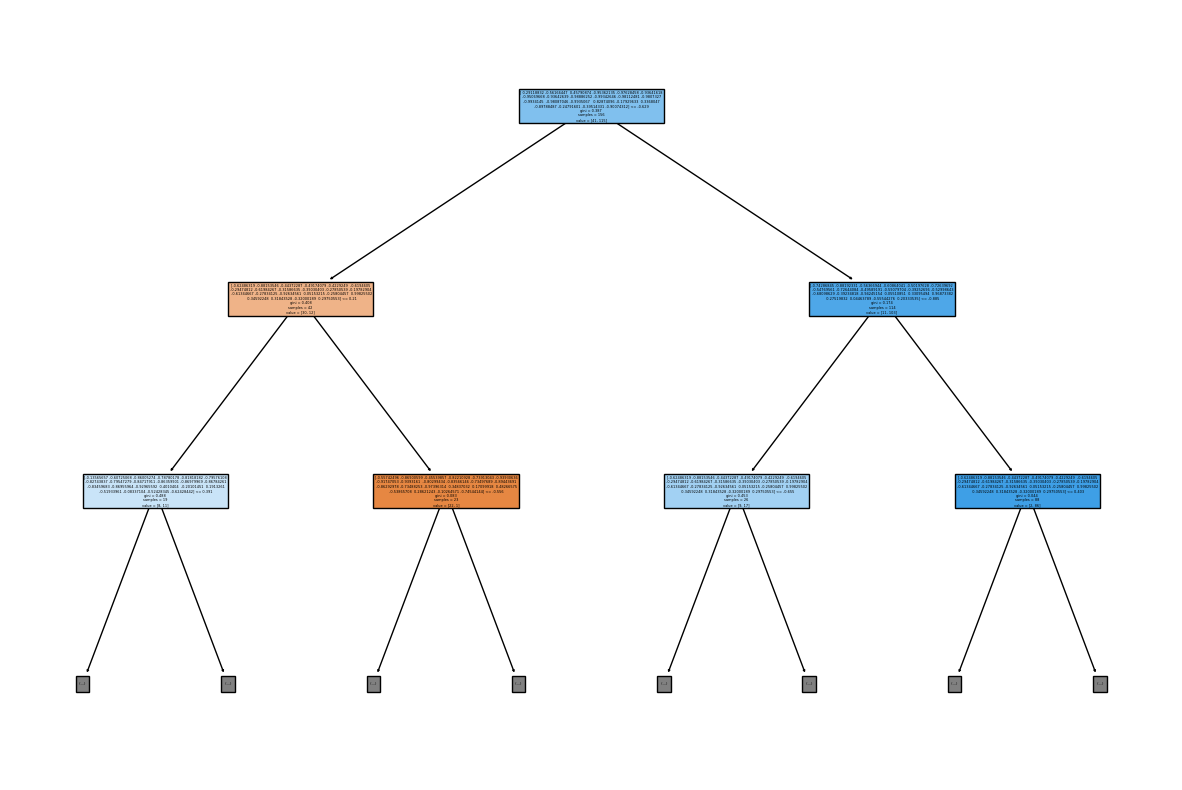

In [223]:
plt.figure(figsize =(15,10))
plot_tree(dt, feature_names=X_train, max_depth=2, filled=True);


### Summary

In [224]:
DT_ACC=accuracy_score(y_test, pred_dt_test)
DT_REC=recall_score(y_test, pred_dt_test)
DT_MSE =mean_squared_error(y_test,pred_dt_test)

print('accuracy score %.2f'% DT_ACC)
print('recall score %.2f'% DT_REC)
print('root mean sqaured score %.2f'% DT_MSE)

accuracy score 0.92
recall score 0.97
root mean sqaured score 0.08


# Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


In [226]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [227]:
pred_rf = rf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test, pred_rf))


Test Accuracy:  0.9230769230769231


Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



<Axes: >

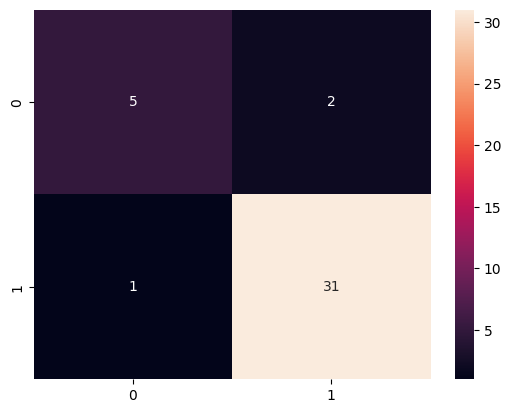

In [228]:
print("Confusion Matrix: ")
cf_matrix=confusion_matrix(y_test, pred_rf)

print("\nClassification Report:")
print(classification_report(y_test, pred_rf))
sns.heatmap(cf_matrix, annot=True)


### Summary

In [229]:
RF_ACC=accuracy_score(y_test, pred_rf)
RF_REC=recall_score(y_test, pred_rf)
RF_MSE =mean_squared_error(y_test,pred_rf)

print('accuracy score %.2f'% RF_ACC)
print('recall score %.2f'% RF_REC)
print('root mean sqaured score %.2f'% RF_MSE)

accuracy score 0.92
recall score 0.97
root mean sqaured score 0.08


# Summary 

In [230]:
modelDF = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Random Forest', 'Decision Trees','XGBoost'],
    'RMSE'    : [LOG_MSE, RF_MSE, DT_MSE,XGB_MSE],
    'Accuracy'    : [LOG_ACC, RF_ACC, DT_ACC,XGB_ACC],
    'Recall'   : [LOG_REC,RF_REC, DT_REC,XGB_REC],
    }, columns = ['Model', 'RMSE', 'Accuracy', 'Recall'])

modelDF.sort_values(by='Accuracy', ascending=False)

,Model,RMSE,Accuracy,Recall
3,XGBoost,0.025641,0.974359,0.966667
0,Logistic Regression,0.076923,0.923077,1.000000
1,Random Forest,0.076923,0.923077,0.968750
2,Decision Trees,0.076923,0.923077,0.968750
